# Kaggle Playground - House Prices: Advanced Regression Techniques

Database: https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
Data analysis: https://rpubs.com/Ludovicbenistant/HousePrice  
Code Source:
- EDA: https://www.kaggle.com/xchmiao/house-prices-advanced-regression-techniques/detailed-data-exploration-in-python
- Bayesian model: http://twiecki.github.io/blog/2014/03/17/bayesian-glms-3/    


## Data description

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The potential for creative feature engineering provides a rich opportunity for fun and learning. This dataset lends itself to advanced regression techniques like random forests and gradient boosting with the popular XGBoost library. We encourage Kagglers to create benchmark code and tutorials on Kernels for community learning. Top kernels will be awarded swag prizes at the competition close.

Acknowledgments

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It’s an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

Find more information about the data here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques  


***

## Data exploration

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd
import seaborn as sns

# Load data
#R.data# housedata = pd.read_csv('Subset_houseprice.csv')
housedata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
# have a glance on the data
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
housedata.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:
housedata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Information about our target variable: house prices

In [6]:
print(housedata['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


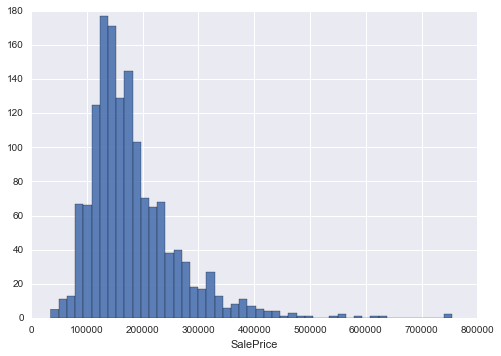

In [16]:
sns.distplot(housedata['SalePrice'], kde = False, hist_kws={'alpha': 0.9})

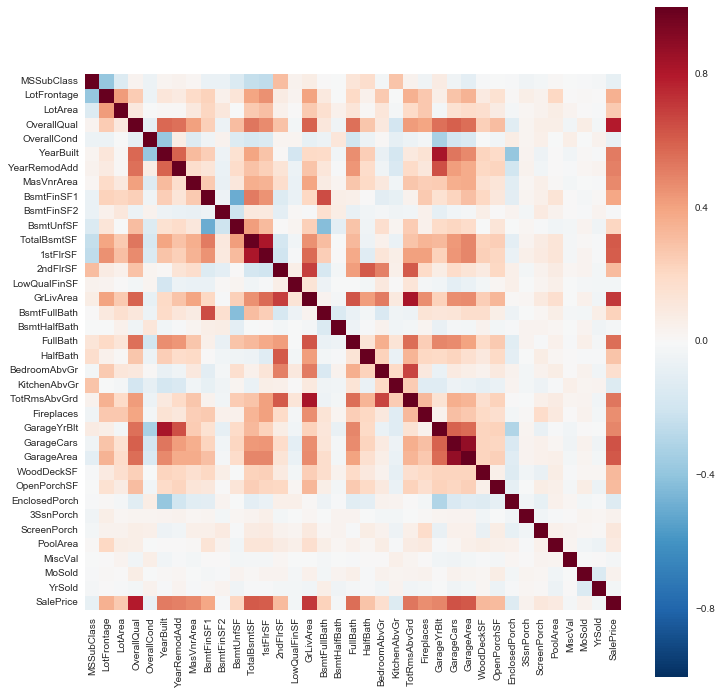

In [17]:
corr = housedata.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#### List the numerical features decendingly by their correlation with Sale Price:


In [18]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-0.0778558940486776
MoSold: 	0.04643224522381936
3SsnPorch: 	0.044583665335

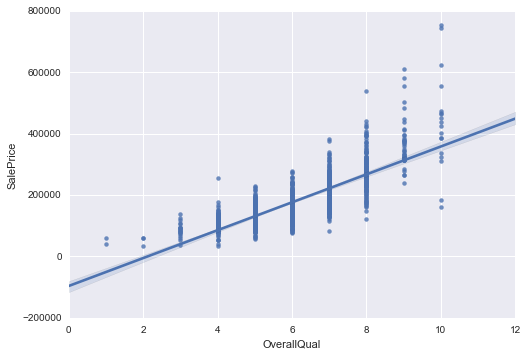

In [20]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = housedata)

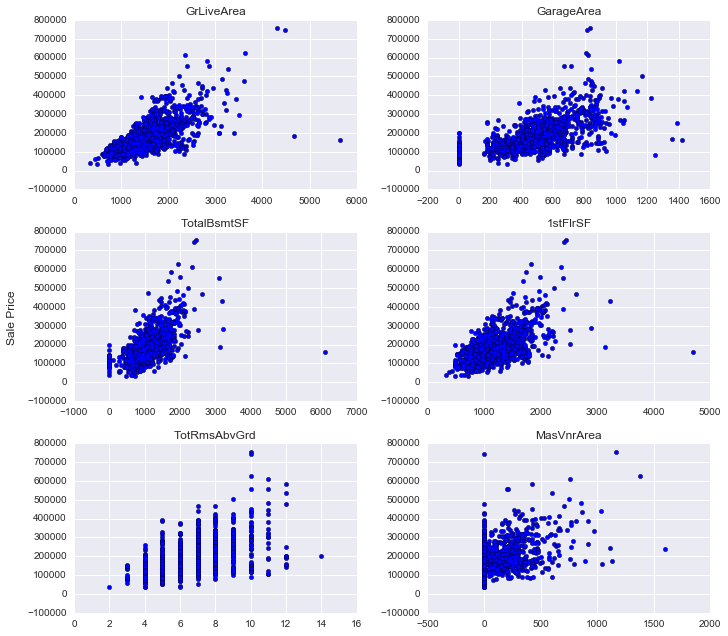

In [23]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = housedata.SalePrice.values
axarr[0, 0].scatter(housedata.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(housedata.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(housedata.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(housedata['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(housedata.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(housedata.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

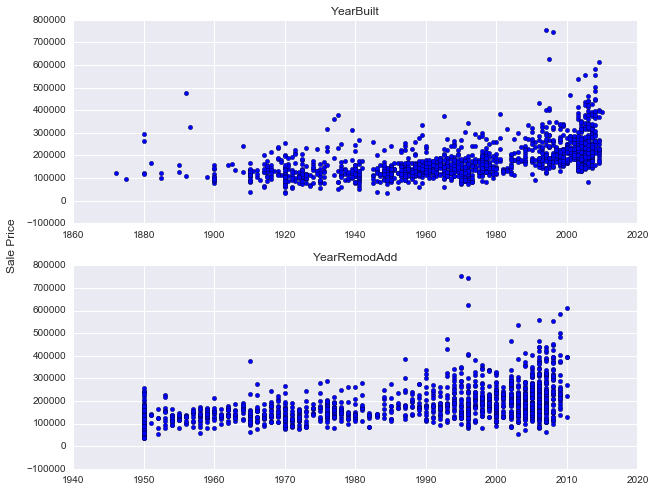

In [24]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(housedata.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(housedata.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

### Categorical Features

In [25]:
print(housedata.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


#### Neighborhood

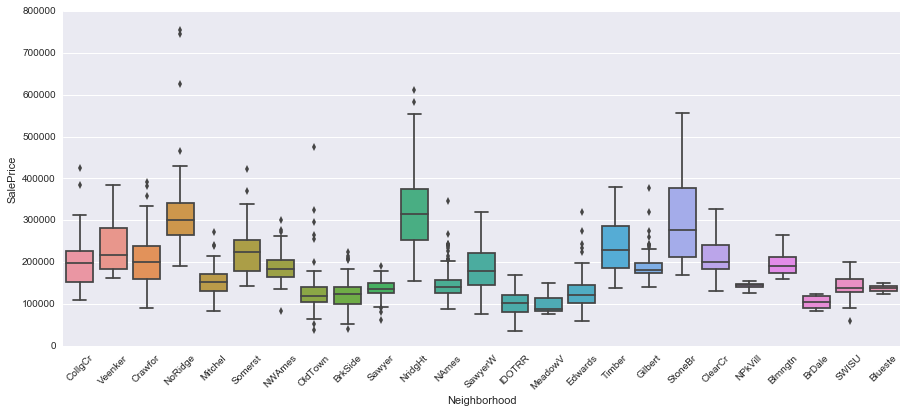

In [28]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = housedata)
xt = plt.xticks(rotation=45)

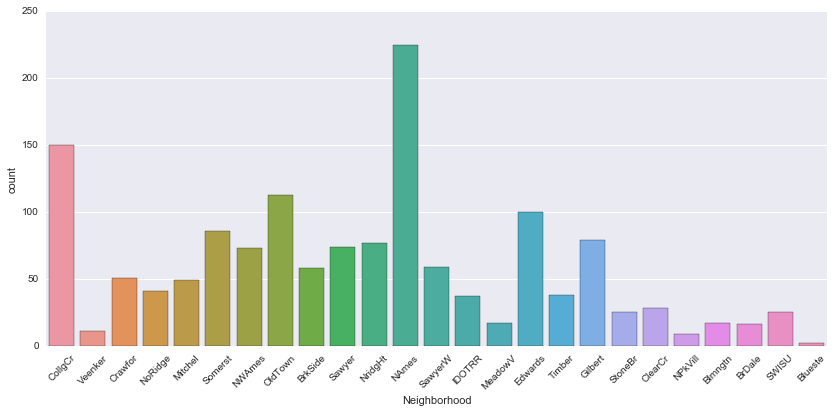

In [31]:
plt.figure(figsize = (14, 6))
sns.countplot(x = 'Neighborhood', data = housedata)
xt = plt.xticks(rotation=45)

#### Housing Price vs Sales
- Sale Type & Condition
- Sales Seasonality

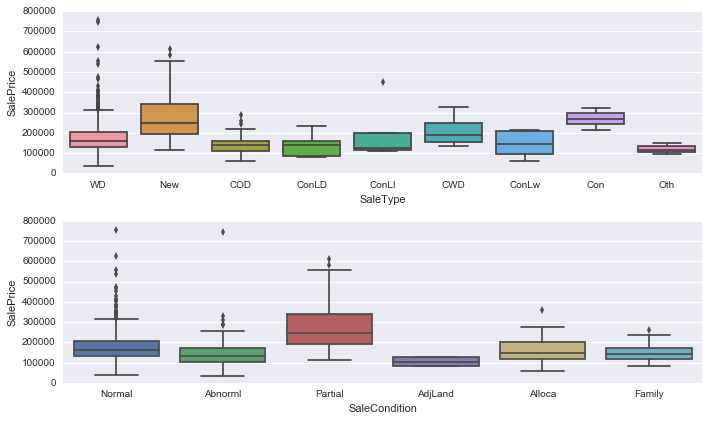

In [32]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housedata, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housedata, ax = ax[1])
plt.tight_layout()

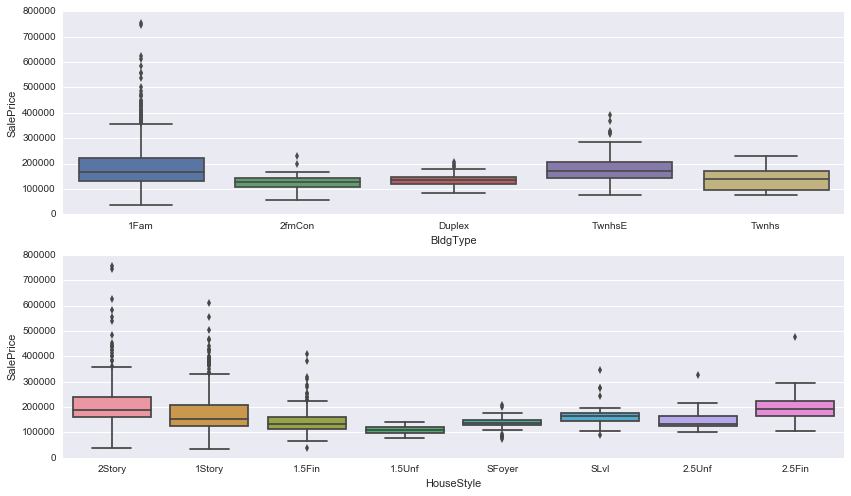

In [36]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housedata, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housedata, ax = ax[1])

#### Housing Condition

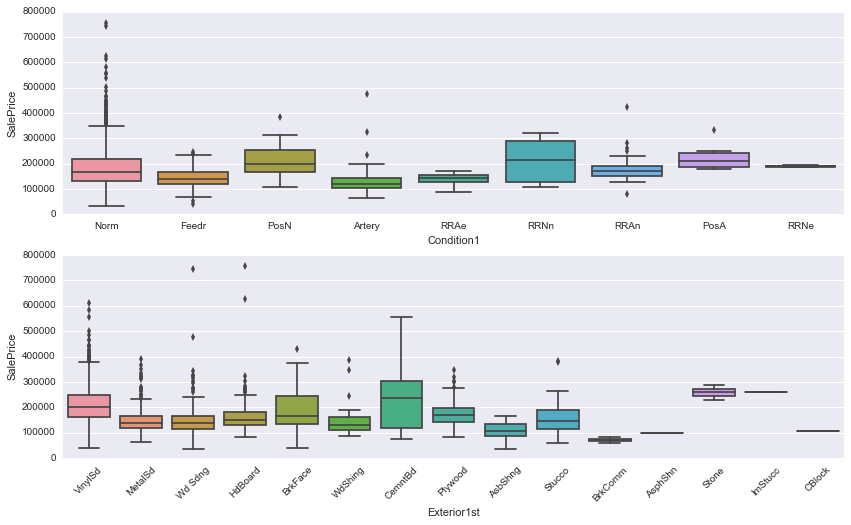

In [35]:
fig, ax = plt.subplots(2, 1, figsize = (14, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housedata, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housedata, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

#### Basement Conditions

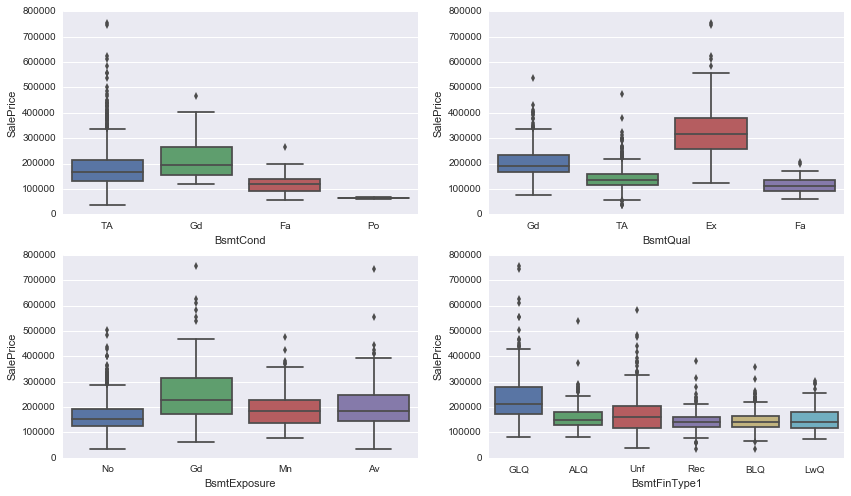

In [38]:
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = housedata, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = housedata, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = housedata, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = housedata, ax = ax[1, 1])

#### FirePlace Quality

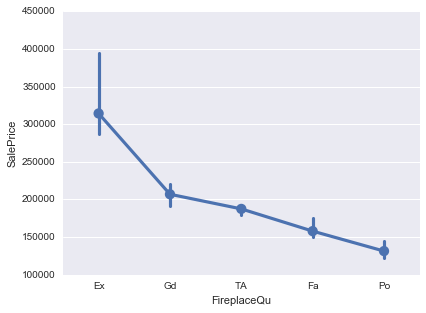

In [41]:
sns.factorplot('FireplaceQu', 'SalePrice', data = housedata, \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [42]:
pd.crosstab(housedata.Fireplaces, housedata.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


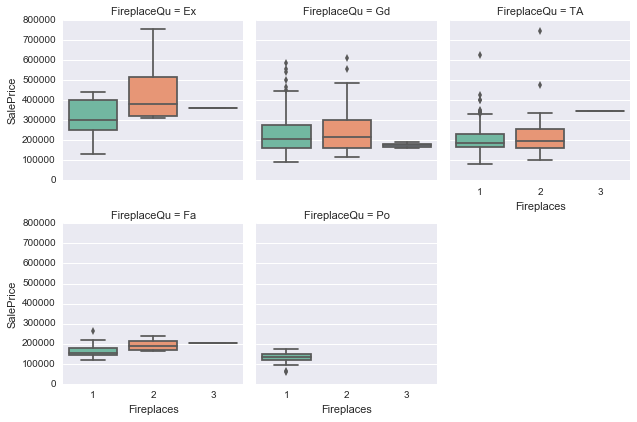

In [43]:
g = sns.FacetGrid(housedata, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

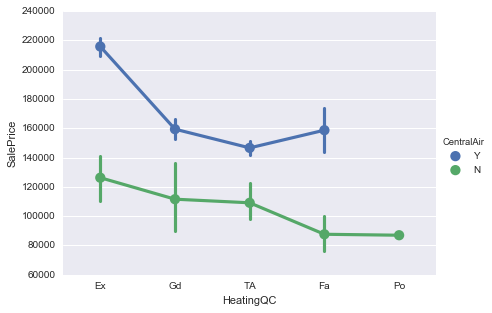

In [45]:
# Clearly, having AC or not has a big impact on housing price.
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = housedata, 
             size = 4.5, aspect = 1.4)

- Kitchen Quality

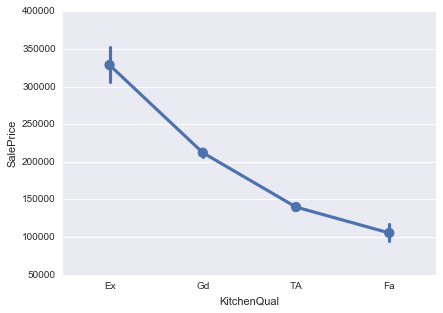

In [47]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = housedata, order = ['Ex', 'Gd', 'TA', 'Fa'])

***

## Data preparation

We will try several different hierarchical models
- Heating quality
- Neighborhood

#### 1.  Heating quality + Central Air

In [119]:
housedata['HeatingQCName'] = housedata['HeatingQC']

In [120]:
housedata['HeatingQC'] = housedata['HeatingQC'].astype('category')
housedata['CentralAir'] = housedata['CentralAir'].astype('category')

In [121]:
cat_columns = housedata.select_dtypes(['category']).columns
housedata[cat_columns] = housedata[cat_columns].apply(lambda x: x.cat.codes)
# housedata['HeatingQC'] += 1

In [122]:
# Our database
HeatingQC_names = housedata.HeatingQCName.unique()
HeatingQC_idx = housedata.HeatingQC.values
n_HeatingQC = len(housedata.HeatingQCName.unique())
housedata[['HeatingQCName', 'HeatingQC', 'CentralAir', 'SalePrice']].head()

,HeatingQCName,HeatingQC,CentralAir,SalePrice
0,Ex,0,1,208500
1,Ex,0,1,181500
2,Ex,0,1,223500
3,Gd,2,1,140000
4,Ex,0,1,250000


In [123]:
housedata['log_SalePrice'] = np.log(housedata.SalePrice)

In [124]:
housedata[['HeatingQCName', 'HeatingQC', 'CentralAir', 'SalePrice', 'log_SalePrice']].head()

,HeatingQCName,HeatingQC,CentralAir,SalePrice,log_SalePrice
0,Ex,0,1,208500,12.247694
1,Ex,0,1,181500,12.109011
2,Ex,0,1,223500,12.317167
3,Gd,2,1,140000,11.849398
4,Ex,0,1,250000,12.429216


In [125]:
housedata.HeatingQCName.describe()

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQCName, dtype: object

In [126]:
housedata.CentralAir.describe()

count    1460.000000
mean        0.934932
std         0.246731
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CentralAir, dtype: float64

In [127]:
## Why it's not working?
data = housedata[['HeatingQCName', 'HeatingQC', 'CentralAir', 'SalePrice', 'log_SalePrice']]

In [128]:
data.describe()

,HeatingQC,CentralAir,SalePrice,log_SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.538356,0.934932,180921.195890,12.024051
std,1.739524,0.246731,79442.502883,0.399452
min,0.000000,0.000000,34900.000000,10.460242
25%,0.000000,1.000000,129975.000000,11.775097
50%,0.000000,1.000000,163000.000000,12.001505
75%,4.000000,1.000000,214000.000000,12.273731
max,4.000000,1.000000,755000.000000,13.534473


# Bayesian Hierarchical Linear Regression (Pymc3)

## Heating quality example

In [129]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sd=100**2)
    sigma_a = pm.HalfCauchy('sigma_a', 5)
    mu_b = pm.Normal('mu_b', mu=0., sd=100**2)
    sigma_b = pm.HalfCauchy('sigma_b', 5)
    
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=n_HeatingQC)
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=n_HeatingQC)
    
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    house_est = a[HeatingQC_idx] + b[HeatingQC_idx] * housedata.CentralAir.values
    
    # Data likelihood
    house_like = pm.Normal('house_like', mu=house_est, sd=eps, observed=housedata.log_SalePrice)

In [132]:
with hierarchical_model:
    means, sds, elbos = pm.variational.advi(n=100000)

Average ELBO = -541.44: 100%|██████████| 100000/100000 [00:23<00:00, 4325.35it/s]


In [133]:
# Inference button (TM)!
with hierarchical_model:
    #start = pm.find_MAP()
    step = pm.NUTS(scaling=means)
    hierarchical_trace = pm.sample(5000, step, start=means, progressbar=False)

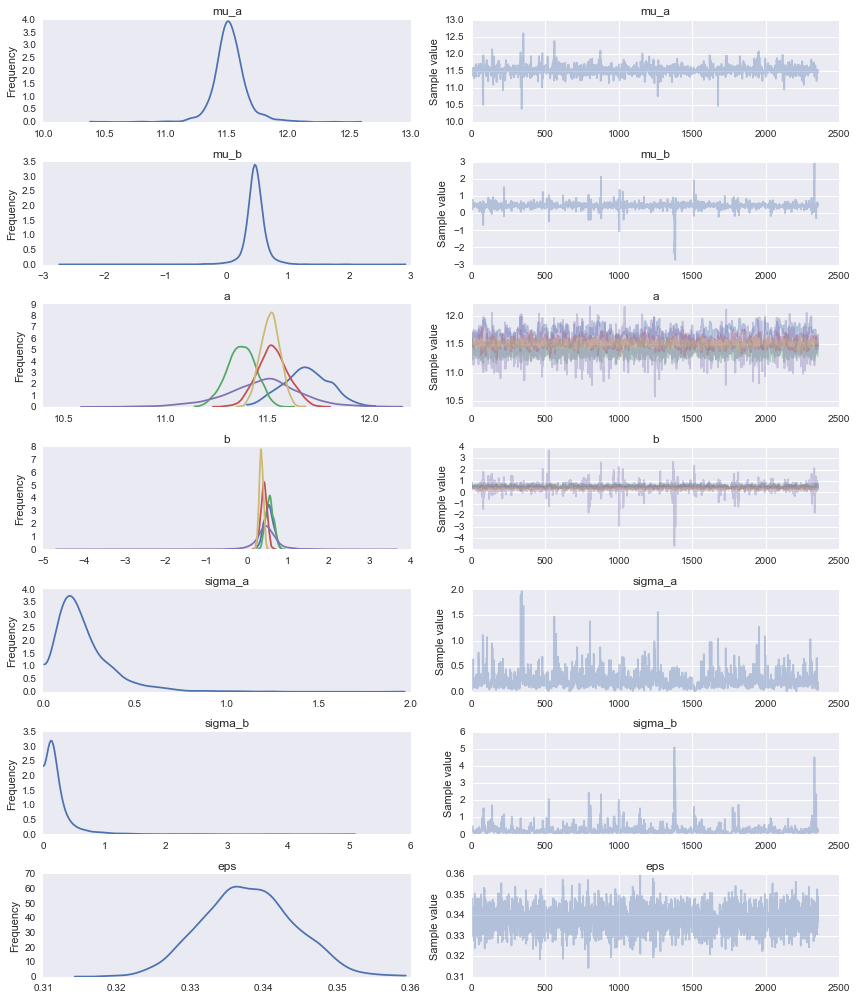

In [134]:
pm.traceplot(hierarchical_trace[2000:]);

## Neighborhood

Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
       
      

In [135]:
# Load data from the R analysis https://rpubs.com/Ludovicbenistant/HousePrice
housedata = pd.read_csv('Subset_houseprice.csv')

In [2]:
# change the charater to numeric
Neighborhood_names = housedata.Neighborhood.unique()
Neighborhood_idx = housedata.NeighborhoodN.values
n_Neighborhoods = len(housedata.Neighborhood.unique())
# We pick only 3 variables to build our Hierarchical model
# and the log(salesprice).
housedata[['Neighborhood' , 'Fireplaces', 'SalePrice']].head()

,Neighborhood,Fireplaces,SalePrice
0,CollgCr,0,12.247694
1,Veenker,1,12.109011
2,CollgCr,1,12.317167
3,Crawfor,1,11.849398
4,NoRidge,1,12.429216


#### Remarks
-*The SalePrice is a log()*  
-*Fireplaces has been changed to a binary variable*  
-*We also created a numeric variable from the neighborhood's name*  


In [90]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sd=100**2)
    sigma_a = pm.HalfCauchy('sigma_a', 5)
    mu_b = pm.Normal('mu_b', mu=0., sd=100**2)
    sigma_b = pm.HalfCauchy('sigma_b', 5)
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_Neighborhoods).
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=n_Neighborhoods)
    # Intercept for each n_Neighborhood, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=n_Neighborhoods)
    
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    house_est = a[Neighborhood_idx] + b[Neighborhood_idx] * housedata.Fireplaces.values
    
    # Data likelihood
    house_like = pm.Normal('house_like', mu=house_est, sd=eps, observed=housedata.SalePrice)

In [67]:
# Inference button (TM)!
with hierarchical_model:
    hierarchical_trace = pm.sample(draws=5000, n_init=20000)

100%|██████████| 5000/5000 [07:20<00:00, 11.35it/s]


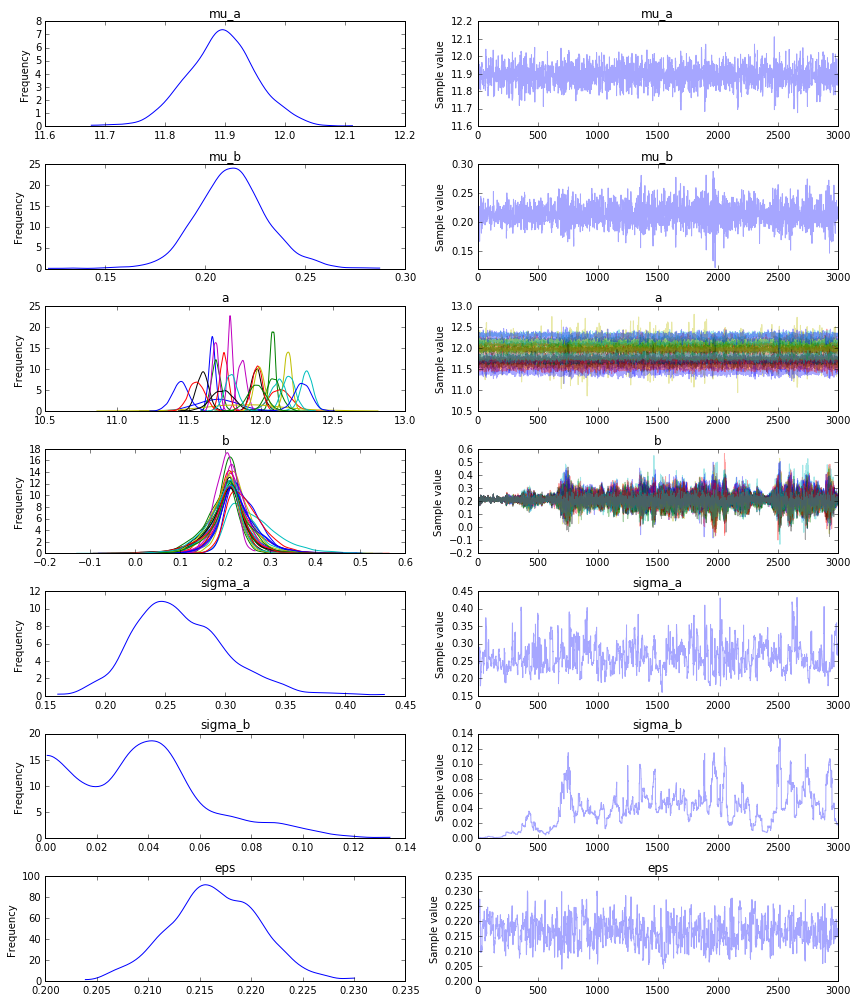

In [68]:
pm.traceplot(hierarchical_trace[2000:]);

The left column (called the marginal posteriors) tells us what matters the most:   
-**mu_a** (or **a** at the neighborhood level) is the mean.  
--> **mu_a** is the mean of all the houses.   
--> **a** is the mean for one given neighborhood. **And we can see how different they are for each neighborhood.**   
  
**The width of the curve reveals the uncertainty in our estimate.**   
  
-**mu_b** (or **b** at the neighborhood level) represents the influence of having a fireplace.   
--> **mu_b** shows that the houses with a fireplace tend to be more expensive (around 0.21).   
--> **b** is the same thing, but for each neighborhood. **And we can see how similar they are.** It means that no matter in which neighborhoods you are located, having a fireplace affects the price by ~0.21.  
   
**eps** displays the model error.